In [1]:
%matplotlib ipympl

# Importe
import numpy as np
from numpy.linalg import norm
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy.linalg import sqrtm

In [2]:
# Funktion Basisklasse
class Function(object):
    def y(self,x):    pass
    def grad(self,x): pass
    def H(self,x):    pass

In [3]:
# Definition einer quadratischen Funktion
A = np.array([[1,0],[0,1]])
b = np.array([0,0])
class f_quad(Function):
    def y(self,x):    return .5*(x[0]*A[0][0]*x[0] + x[0]*A[0][1]*x[1] + x[1]*A[1][0]*x[0] + x[1]*A[1][1]*x[1]) + b[0]*x[0] + b[1]*x[1]
    def grad(self,x): return [b[0],b[1]] + np.dot(A,x)
    def H(self,x):    return A

In [4]:
# Gradientenverfahren
def gradDesc(f, start_x, eps, max_iter=100, alpha = .8):
    x = [[0,0]]
    x[k:=0] = start_x

    while np.linalg.norm(f.grad(x[k]))>eps:
        x.append([0,0])

        # Suchrichtung und Schrittweite bestimmen
        p_k = -f.grad(x[k])
        alpha_k = alpha # konstant
        
        # Iterationsschritt
        x[k+1] = x[k] + alpha_k*p_k; k += 1
        if(k>max_iter): break

    # liefere Pfad zurück
    return np.array(x)

In [5]:
# Newton-Verfahren
def newton(f, start_x, eps, max_iter=10, alpha=1):
    x = [[0,0]]
    x[k:=0] = start_x

    while np.linalg.norm(f.grad(x[k]))>eps:
        x.append([0,0])

        # Suchrichtung und Schrittweite bestimmen
        p_k = -np.linalg.solve(f.H(x[k]),f.grad(x[k]))
        alpha_k = alpha # konstant

        # Iterationsschritt
        x[k+1] = x[k] + alpha_k*p_k; k += 1
        if(k>max_iter): break

    # liefere Pfad zurück
    return np.array(x)

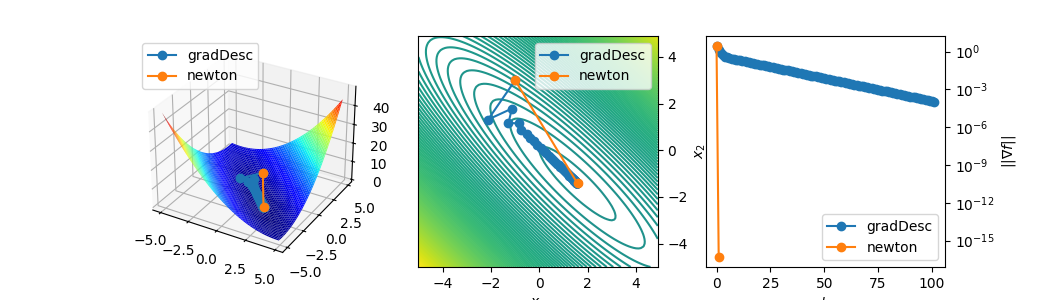

In [6]:
# Wähle Verfahren, die verglichen werden sollen:
verfahren = [gradDesc, newton]

# Funktion und Definitionsbereich festlegen
A=np.array([[1,0.9],[0.9,1]])
b = np.array([-.3,0])
f = f_quad(); (x1_min,x1_max,x2_min,x2_max) = (-5,5,-5,5); start_x = [-1,3]

# Grid und Werte für Konturplot berechnen
x1,x2 = np.meshgrid(np.arange(x1_min,x1_max,.1),np.arange(x2_min,x2_max,.1))
lines = np.arange(-50,50,.5)
y = f.y((x1,x2))

# Koordinatentransformation
#y = f.y(np.tensordot(sqrtm(np.linalg.inv(A)),(x1,x2),axes=([1],[0])))

# 3d-Function
fig=plt.figure(figsize=(10.5,3))
ax = fig.add_subplot(131,projection='3d')
ax.plot_surface(x1,x2,y,cmap='jet')
for v in verfahren:
    x = v(f,start_x,1e-6)
    plt.plot(x[:,0],x[:,1], "-o",zorder=10, label=v.__name__)
plt.legend()

# Höhenlinien und Pfad
ax=plt.subplot(132)
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
plt.contour(x1,x2,y,lines)
for v in verfahren:
    x = v(f,start_x,1e-6)
    #x = np.tensordot(sqrtm(A),x.T,axes=([1],[0])).T # Koord.transformation
    plt.plot(x[:,0],x[:,1], "-o", label=v.__name__)
plt.xlabel('$x_1$');plt.ylabel('$x_2$');
plt.legend()

# Konvergenzrate
ax=plt.subplot(133)
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
for v in verfahren:
    x = v(f,start_x,1e-6)
    plt.plot(range(len(x)),list(map(lambda x : norm(f.grad((x))), x)),'-o',label=v.__name__)
plt.xlabel('$k$');plt.ylabel(r'$||\nabla f||$');
plt.yscale('log')
plt.legend()
plt.show()